<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Regularization: Penalized regression

Regularization force the learning algorithm to build a less complex model . In practice, that often leads to slightly higher bias but significantly reduces the variance. The most common penalized regression models are:

1. Ridge regression
2. Lasso regression
3. Elastic Net regression

In this notebook we will explore the three methods and compare their results with a multiple linear regression model applied to Boston Housing dataset. The target variable is **price** and the features are 10 polynomial features of **LSTAT**: % lower status of the population. LSTAT2= $LSTAT^2$, LSTAT3= $LSTAT^3$, and etc. 

First we need to import the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
df = pd.read_csv("Regularization_Boston.csv")

In [4]:
df.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,24.0,4.98,24.8004,123.505992,615.059840,3062.998004,15253.730060,7.596358e+04,3.782986e+05,1.883927e+06,9.381957e+06
1,21.6,9.14,83.5396,763.551944,6978.864768,63786.823980,583011.571200,5.328726e+06,4.870455e+07,4.451596e+08,4.068759e+09
2,34.7,4.03,16.2409,65.450827,263.766833,1062.980336,4283.810755,1.726376e+04,6.957294e+04,2.803790e+05,1.129927e+06
3,33.4,2.94,8.6436,25.412184,74.711821,219.652754,645.779096,1.898591e+03,5.581856e+03,1.641066e+04,4.824733e+04
4,36.2,5.33,28.4089,151.419437,807.065599,4301.659644,22927.845900,1.222054e+05,6.513549e+05,3.471722e+06,1.850428e+07


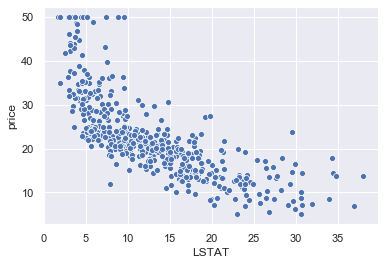

In [5]:
sns.scatterplot(x='LSTAT', y='price', data=df)
plt.show()

**important**: we need to normalize the features before training the models. Why? 


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[ 0.15968566, -1.0755623 , -0.78952949, ..., -0.20115811,
        -0.1777807 , -0.15953586],
       [-0.10152429, -0.49243937, -0.54045362, ..., -0.20100802,
        -0.17774223, -0.15952611],
       [ 1.32424667, -1.2087274 , -0.82582493, ..., -0.20115907,
        -0.17778084, -0.15953588],
       ...,
       [ 0.14880191, -0.98304761, -0.7598079 , ..., -0.20115611,
        -0.17778036, -0.1595358 ],
       [-0.0579893 , -0.86530163, -0.71663755, ..., -0.20114963,
        -0.17777912, -0.15953557],
       [-1.15724782, -0.66905833, -0.63138918, ..., -0.20111311,
        -0.1777707 , -0.15953367]])

In [8]:
df.describe()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,22.532806,12.653063,210.993989,4285.788793,1.001336e+05,2.587609e+06,7.198029e+07,2.114923e+09,6.477077e+10,2.048399e+12,6.645292e+13
std,9.197104,7.141062,236.061920,7329.288372,2.342059e+05,7.737927e+06,2.628503e+08,9.126326e+09,3.223061e+11,1.153345e+13,4.169512e+14
min,5.000000,1.730000,2.992900,5.177717,8.957450e+00,1.549639e+01,2.680875e+01,4.637914e+01,8.023592e+01,1.388081e+02,2.401381e+02
25%,17.025000,6.950000,48.303700,335.727443,2.333481e+03,1.621932e+04,1.127384e+05,7.836504e+05,5.447333e+06,3.786664e+07,2.632333e+08
50%,21.200000,11.360000,129.050000,1466.017088,1.665411e+04,1.891930e+05,2.149266e+06,2.441612e+07,2.773731e+08,3.151037e+09,3.579677e+10
75%,25.000000,16.955000,287.472100,4874.091998,8.264029e+04,1.401168e+06,2.375683e+07,4.027977e+08,6.829447e+09,1.157935e+11,1.963285e+12
max,50.000000,37.970000,1441.720900,54742.142570,2.078559e+06,7.892289e+07,2.996702e+09,1.137850e+11,4.320410e+12,1.640460e+14,6.228820e+15


In [9]:
# checking the first observation for CRIM
(24-22.5328)/9.197104

0.1595284776599241

In [10]:
df.columns

Index(['price', 'LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6',
       'LSTAT7', 'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [11]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,price,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
0,0.159686,-1.075562,-0.789529,-0.568459,-0.425339,-0.334341,-0.274058,-0.231960,-0.201158,-0.177781,-0.159536
1,-0.101524,-0.492439,-0.540454,-0.481046,-0.398141,-0.326485,-0.271896,-0.231384,-0.201008,-0.177742,-0.159526
2,1.324247,-1.208727,-0.825825,-0.576388,-0.426841,-0.334599,-0.274100,-0.231966,-0.201159,-0.177781,-0.159536
3,1.182758,-1.361517,-0.858040,-0.581856,-0.427649,-0.334708,-0.274114,-0.231968,-0.201159,-0.177781,-0.159536
4,1.487503,-1.026501,-0.774228,-0.564647,-0.424519,-0.334180,-0.274029,-0.231955,-0.201157,-0.177781,-0.159536


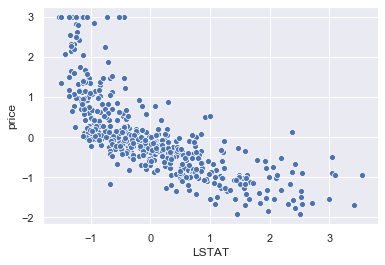

In [12]:
sns.scatterplot(x='LSTAT', y='price', data=df_sc)
plt.show()

###  Splitting the data

In [13]:
y = df_sc['price']
X = df_sc.drop('price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,LSTAT,LSTAT2,LSTAT3,LSTAT4,LSTAT5,LSTAT6,LSTAT7,LSTAT8,LSTAT9,LSTAT10
300,-0.922773,-0.738456,-0.554782,-0.422166,-0.333671,-0.273926,-0.231935,-0.201154,-0.177780,-0.159536
32,2.110588,2.361250,2.320551,2.091900,1.778692,1.449896,1.143940,0.878417,0.658205,0.481244
181,-0.448985,-0.516017,-0.470071,-0.393883,-0.324988,-0.271404,-0.231230,-0.200962,-0.177729,-0.159522
272,-0.690084,-0.641318,-0.522245,-0.412708,-0.331167,-0.273304,-0.231787,-0.201120,-0.177772,-0.159534
477,1.718101,1.736491,1.525676,1.217641,0.905982,0.635721,0.420786,0.259256,0.142724,0.061306


As we can see from the table above, the variables are **highly correlated** with each other. Let's first run a linear regression and see the results as a benchmark. 

In [14]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [15]:
sm.OLS(y_train, X_train_wc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     82.44
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           4.51e-90
Time:                        01:20:48   Log-Likelihood:                -344.23
No. Observations:                 404   AIC:                             710.5
Df Residuals:                     393   BIC:                             754.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.029      0.417      0.677      -0.044       0.068
LSTAT         10.4856     14.789      0.709      0.479     -18.591      39.562
LSTAT2      -198.4474    183.865     -1.079      0.281    -559.929     163.035
LSTAT3      1218.5360   1157.209      1.053      0.293   -1056.559    3493.631
LSTAT4     -4039.5201   4549.147     -0.888      0.375    -1.3e+04    4904.187
LSTAT5      8029.8874   1.19e+04      0.675      0.500   -1.54e+04    3.14e+04
LSTAT6     -9630.6577   2.11e+04     -0.456      0.649   -5.11e+04    3.19e+04
LSTAT7      6399.3109   2.51e+04      0.255      0.799    -4.3e+04    5.58e+04
LSTAT8     -1554.6344   1.92e+04     -0.081      0.935   -3.93e+04    3.62e+04
LSTAT9      -523.9209   8485.139     -0.062      0.951   -1.72e+04    1.62e+04
LSTAT10      288.1741   1645.665      0.175      0.861   -2947.235    3523.583
==============================================================================
Omnibus:                      106.759   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.634
Skew:                           1.217   Prob(JB):                     3.91e-70
Kurtosis:                       6.614   Cond. No.                     4.56e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----

# A) Training the models 

In this section we will train 4 different models:
1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [16]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [17]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [18]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [19]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
483,-0.079757,-0.019459,0.029108,0.009199,0.059533
426,-1.342272,-0.480570,-0.589703,0.009199,-0.054729
22,-0.798084,-0.736176,-0.786380,0.009199,-0.120425
268,2.282016,2.053967,1.495823,0.009199,0.216942
371,2.989460,0.041490,0.171371,0.009199,0.078830


### coefficients

In [20]:
df.drop('price', axis=1, inplace=False).columns

Index(['LSTAT', 'LSTAT2', 'LSTAT3', 'LSTAT4', 'LSTAT5', 'LSTAT6', 'LSTAT7',
       'LSTAT8', 'LSTAT9', 'LSTAT10'],
      dtype='object')

In [21]:
coefficients = pd.DataFrame({'Features':df.drop('price', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,LSTAT,10.485596,-1.997427,-0.0,-0.154677
1,LSTAT2,-198.447363,1.120503,-0.0,-0.000000
2,LSTAT3,1218.536028,0.705506,-0.0,-0.000000
3,LSTAT4,-4039.520113,-0.029523,-0.0,-0.000000
4,LSTAT5,8029.887429,-0.331986,-0.0,-0.000000
5,LSTAT6,-9630.657683,-0.305169,-0.0,-0.000000
6,LSTAT7,6399.310937,-0.150135,-0.0,-0.000000
7,LSTAT8,-1554.634401,0.007747,-0.0,-0.000000
8,LSTAT9,-523.920946,0.115016,-0.0,-0.000000
9,LSTAT10,288.174050,0.159595,-0.0,-0.000000


**Challenge**: If we use alpha=0 for all the 3 models above, we should get the same coefficients as linear model. Why the coefficients for Lasso and Elastic Net are different from linear model? Hint: Is there analytical solution?

----

### Performance in the test set

In [22]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.541

In [23]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

0.55867

In [24]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.006

In [25]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.898

-------------

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha

In [26]:
alpha_ridge = 10**np.linspace(-2,4,100)
alpha_ridge[0:10]

array([0.01      , 0.01149757, 0.01321941, 0.01519911, 0.01747528,
       0.02009233, 0.0231013 , 0.02656088, 0.03053856, 0.03511192])

In [27]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 10)

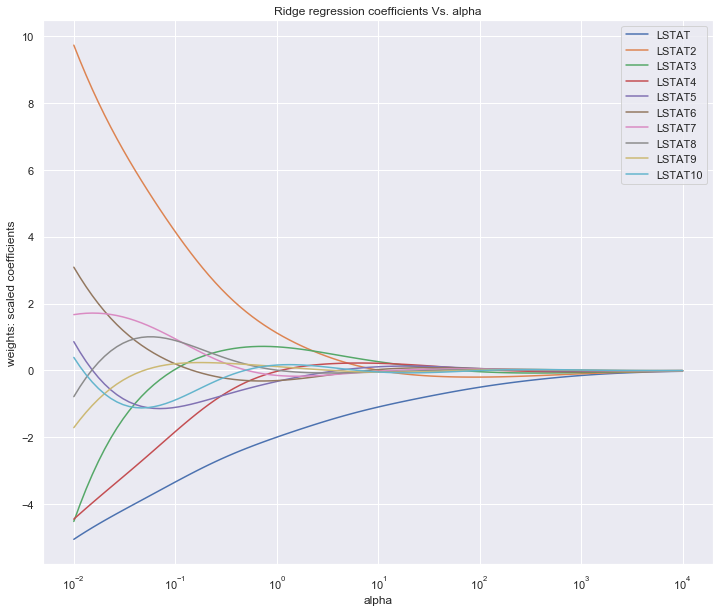

In [28]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

---

#### 2) Lasso regression coefficients vs alpha

In [29]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [30]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

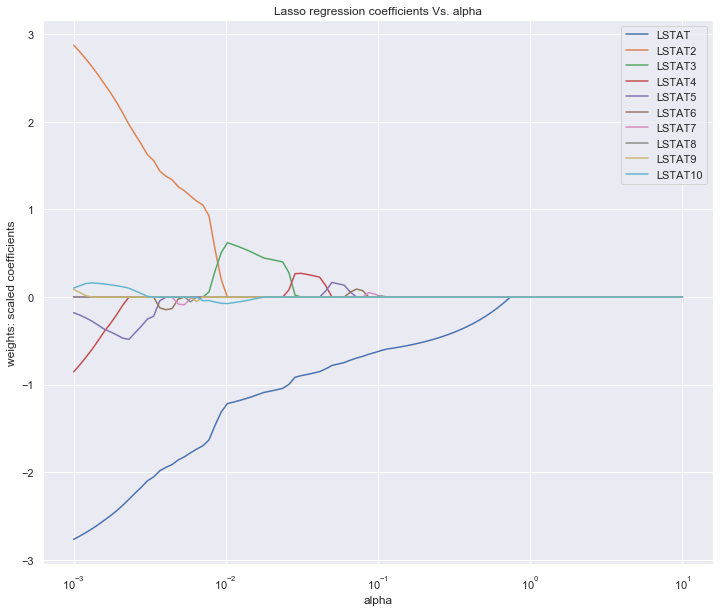

In [31]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

**Challenge**: Looking at the coefficeint of LSTAT4, it seems that at some point it gets to 0 but then again become positive? what's going on here? Hint: remove the warning message at the begining of the notebook! it seems that the algo is not converging!

---

#### 3) Elastic Net regression coefficients vs alpha

In [32]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [33]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

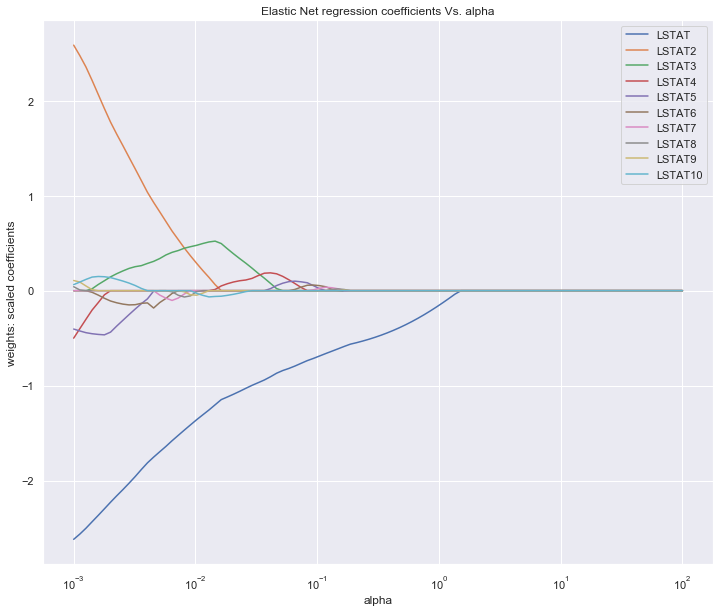

In [34]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('price',axis=1, inplace=False).columns)

plt.show()

----

## Cross Validation 

Let's use cross validation to find the optimal Lambdas (alphas) for different models. 

#### 1) Optimal alpha for Ridge regression

In [35]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.1

In [36]:
alpha_ridge_opt = ridgecv.alpha_

----

#### 2) Optimal alpha for Lasso regression

In [37]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.0007404280761639708

In [38]:
alpha_lasso_opt = lassocv.alpha_

----

#### 3) Optimal alpha for Elastic Net regression

In [39]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.0014808561523279417

In [40]:
alpha_elasticnet_opt = elasticnetcv.alpha_

----

#### Refit the models!

***Exercise***: Now go back and refit the 3 models with the optimal alphas! 
- compare the RMSE_test?
- were you able to beat the linear regression model?
- what do you conclude?

----

###  Additional links:
1- Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

2- A complete example: https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6

3- Standardizing features in Python:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
